Model Performance Analysis of XGBoost for Predicting Stock Prices

Investors and traders can greatly benefit from accurate price predictions in the stock market, which is a complex and dynamic environment. Machine learning algorithms, such as XGBoost, have gained popularity in recent years for their ability to analyze and predict stock prices. XGBoost is applied in this analysis to predict stock prices, evaluate the model's performance, and visualize the predictions. 
The dataset begins with historical price and volume data for a particular stock. In order to prepare the dataset for training and evaluation, the code performs various preprocessing steps, including data manipulation and feature engineering. In order to capture relevant patterns and trends in the data, moving averages, MACD, and RSI are calculated. 
The dataset is then divided into training, validation, and test sets. While the training set is used to train the XGBoost regressor model, the validation set is used to select the best hyperparameters. Afterward, the trained model is evaluated on the test set. 
In addition to the analysis, visualizations are provided to provide insights into the dataset and the model's performance. The model's predictions and their alignment with actual stock prices are displayed in charts displaying actual and predicted stock prices as well as various technical indicators. A feature importance plot reveals the importance of different factors in the model's decision-making process.

In [1]:
import os
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Time series decomposition
!pip install stldecompose
from stldecompose import decompose

# Chart drawing
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Mute sklearn warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)

# Show charts when running kernel
init_notebook_mode(connected=True)

# Change default background color for all visualizations
layout=go.Layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(250,250,250,0.8)')
fig = go.Figure(layout=layout)
templated_fig = pio.to_templated(fig)
pio.templates['my_template'] = templated_fig.layout.template
pio.templates.default = 'my_template'

Various data analysis and visualization tasks are performed by this Python script. The program imports several libraries and sets up the necessary configurations. 
The code starts by importing several libraries, such as os for operating system functions, numpy for numerical calculations, pandas for data manipulation, xgboost for gradient boosting, and matplotlib.pyplot for plotting. 
Next, it imports specific functions and modules from the `xgboost` library, such as plot_importance and plot_tree, which visualize feature importance and decision trees, respectively. 
Also, it imports modules related to data preprocessing and model evaluation from the `sklearn` (scikit-learn) library. A number of these modules are included in the package, including mean_squared_error for calculating mean squared error, MinMaxScaler for scaling numerical data, train_test_split for splitting data into training and testing sets, and GridSearchCV for tuning hyperparameters. 
Using pip, it installs the package stldecompose to perform time series decomposition. A time series can be broken down into its trend, seasonality, and residual components using this package. 
Afterwards, the code imports modules related to chart drawing and visualization from the plotly library. It includes `plotly` as `py`, `plotly.io` as `pio`, `plotly.graph_objects` as `go`, and various other modules for rendering charts offline and online. 
The next step is to suppress warnings from the `sklearn` library using the `simplefilter` function. Future and deprecation warnings are hidden in this way. 
Plotly can display charts in notebook mode when running in a notebook environment. 
As a final step, it sets up a default layout, defining the background color and other visual properties for all visualizations created with plotly. The program creates a `Figure` object with the specified layout and assigns it to the `fig` variable. In addition, it sets the layout template as the default template for all plotly visualizations.

Read historical prices for the stock I am analyzing (e.g. CERN). Over the past 10 years, the New York Stock Exchange dataset provides daily price history. To reduce the amount of data to be processed, I cropped the time frame and started from 2010. 
To keep the data frame clean, rows are removed and reindexed.

In [2]:
ETF_NAME = 'CERN'
ETF_DIRECTORY = '/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/'

df = pd.read_csv(os.path.join(ETF_DIRECTORY, ETF_NAME.lower() + '.us.txt'), sep=',')

df['Date'] = pd.to_datetime(df['Date'])
df = df[(df['Date'].dt.year >= 2010)].copy()
df.index = range(len(df))

df.head()

Date    Open    High     Low   Close   Volume  OpenInt
0 2010-01-04  20.940  21.103  20.713  21.068  3058908        0
1 2010-01-05  21.355  22.345  21.250  22.313  7324724        0
2 2010-01-06  22.500  22.873  22.265  22.548  6844460        0
3 2010-01-07  22.423  22.750  22.230  22.680  2968936        0
4 2010-01-08  22.578  22.663  22.345  22.633  3238372        0

The purpose of this code snippet is to load and prepare a specific dataset related to the stock market. 
It defines two variables: ETF_NAME and ETF_DIRECTORY. This value represents the name of the ETF (Exchange-Traded Fund) being analyzed, which in this case is CERN. The ETF_DIRECTORY specifies the location of the dataset files. 
After reading the ETF data from a CSV file, the code uses the pandas library's read_csv() function. This file path is constructed by joining the ETF_DIRECTORY, the lowercase version of the ETF_NAME, and the extension '.us.txt'. For cross-platform compatibility, this is done with os.path.join(). Data is loaded into a pandas DataFrame called `df`. 
The code then manipulates the DataFrame with some data manipulation steps. This function converts the 'Date' column to datetime format using the "pd.to_datetime()" function. Afterwards, the DataFrame is filtered to keep only rows with a 'Date' column greater than or equal to 2010. A subset of this data is assigned back to the `df` variable. 
After filtering, the code sets df.index = range(len(df)) to a new range of indices. As a result, the index values are consecutive integers starting at 0. 
Lastly, the code displays the first few rows of the modified DataFrame using df.head(). To verify that the ETF dataset has been successfully loaded and preprocessed, this preview is provided.

### OHLC Chart To get a sense of historical prices, I draw an OHLC chart (open/high/low/close). I have drawn a Volume chart below OHLC, which shows the number of stocks traded each day. I explain the importance of OHLC and Volume charts in my previous notebook (linked above).

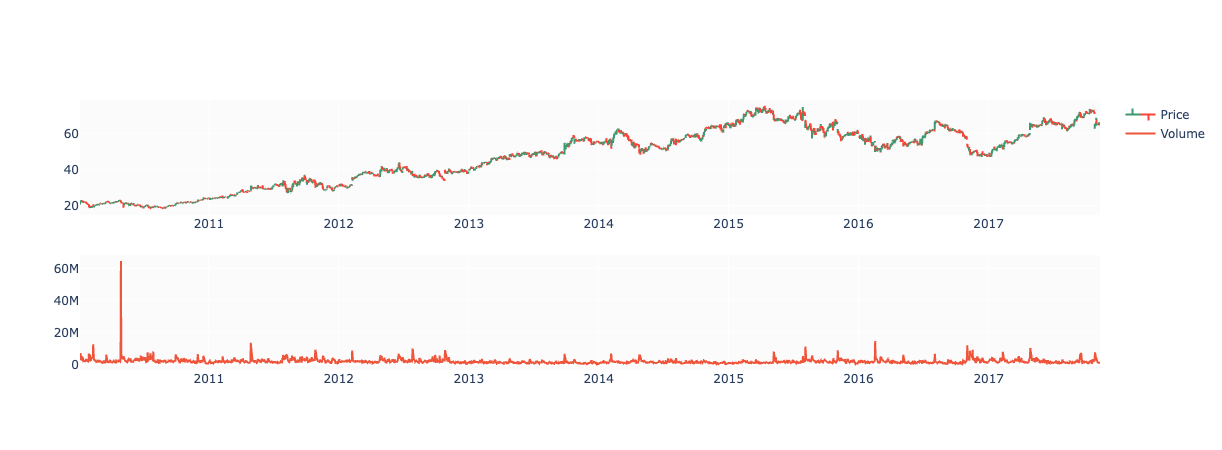

In [3]:
fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Ohlc(x=df.Date,
                      open=df.Open,
                      high=df.High,
                      low=df.Low,
                      close=df.Close,
                      name='Price'), row=1, col=1)

fig.add_trace(go.Scatter(x=df.Date, y=df.Volume, name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

To visualize stock market data, this code snippet uses the plotly library. 
In order to create a plot, it first initializes a figure object called `fig` using the `make_subplots()` function. A two-row, one-column layout indicates that the chart will have two subplots stacked vertically. 
The code then adds a trace to the first subplot using fig.add_trace(). A OHLC chart is created by passing the necessary data to the `go.Ohlc()` function. For the x-axis, the DataFrame's 'Date' column is used, and for the y-axis, the DataFrame's columns for open, high, low, and close prices are used (`df.Open`, `df.High`, `df.Low`, `df.Close`). 'Price' is the name given to the trace. The `row` and `col` arguments specify that this trace should appear in the first row and column of the figure. 
Using fig.add_trace(), the code adds a second trace to the second subplot. It creates a scatter plot by passing the 'Date' column as the x-axis data and the Volume column (`df.Volume`) as the y-axis data. 'Volume' is the name given to this trace. The `row` and `col` arguments indicate that this trace should appear in the figure's second row and first column. 
The code updates the layout of the figure after adding the traces with `fig.update()`. As a result, the design change modifies the layout_xaxis_rangeslider_visible property to "False", which hides the range slider for zooming in on a specific time period on the x-axis. 
Finally, the code displays the figure using `fig.show()`, displaying the OHLC plot in the top subplot and the volume scatter plot in the bottom subplot. Users can analyze price trends and trading volumes using this visual representation of stock market data.

The decomposition process

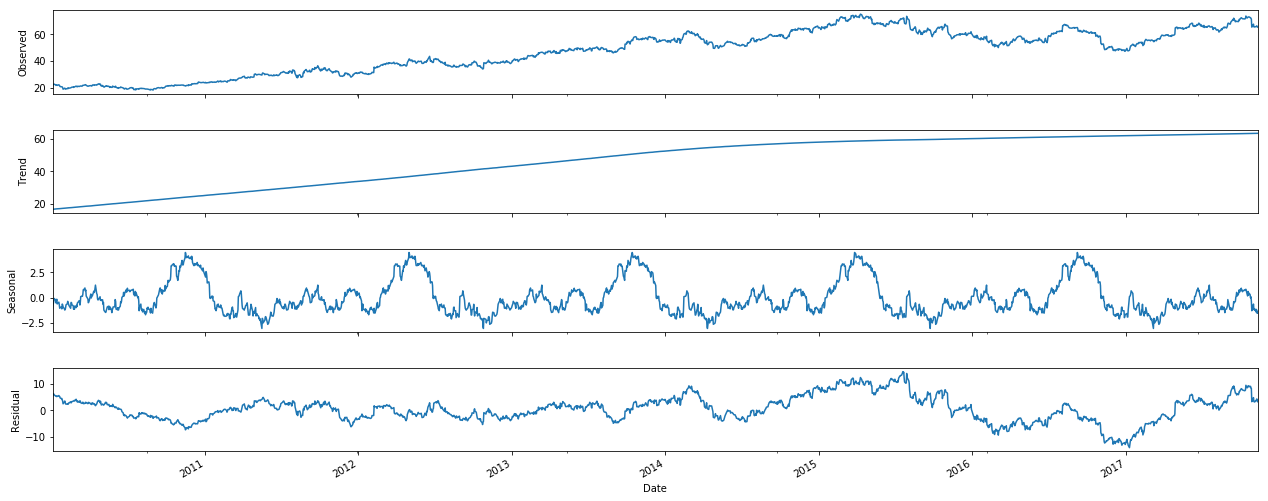

In [4]:
df_close = df[['Date', 'Close']].copy()
df_close = df_close.set_index('Date')
df_close.head()

decomp = decompose(df_close, period=365)
fig = decomp.plot()
fig.set_size_inches(20, 8)

Using the STLdecompose package, we can decompose a stock's closing price into its trend, seasonality, and residual components, and visualize the results. 
In the first step, a new DataFrame is created by selecting only the 'Date' and 'Close' columns from DataFrame `df`. Using double square brackets, the subset is created [['Date', 'Close']]. This method ensures that the new DataFrame is a separate copy of the selected columns. 
A DataFrame is created by setting the 'Date' column as the index using the `set_index()` method. Based on dates, this allows for easier manipulation and indexing. 
A check of the changes is made by displaying the first few rows of `df_close` DataFrame using `df_close.head()`. An example of a modified DataFrame with the 'Date' column set as the index is shown here. 
The next step is to decompose the closing prices using the decompose() function from the stldecompose package. The `decompose()` function takes a DataFrame as input and specifies a period of 365, indicating that the decomposition should consider yearly seasonality. The function separates closing prices into their trend, seasonality, and residual components. 
As a result of decomposing the data, a figure object named `fig` is created using the `plot()` method of the `decomp` object. A plot of the decomposed components is generated. 
Finally, the size of the `fig` object is set to 20 inches in width and 8 inches in height using the `set_size_inches()` method. When displaying the decomposition plot, this adjusts the figure's dimensions for optimal visibility and clarity.

Indicators of technical strength

#### Moving Averages The following moving averages are calculated to be used as features: $SMA_[5]$, $SMA_[10]$, $SMA_[15]$, $SMA_[30]$, and $EMA_[9].

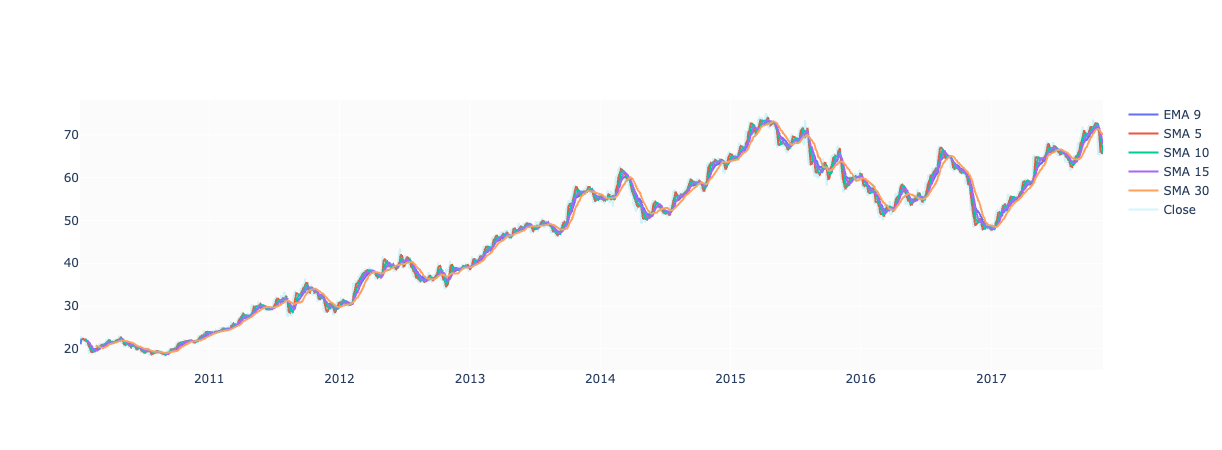

In [5]:
df['EMA_9'] = df['Close'].ewm(9).mean().shift()
df['SMA_5'] = df['Close'].rolling(5).mean().shift()
df['SMA_10'] = df['Close'].rolling(10).mean().shift()
df['SMA_15'] = df['Close'].rolling(15).mean().shift()
df['SMA_30'] = df['Close'].rolling(30).mean().shift()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.Date, y=df.EMA_9, name='EMA 9'))
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_5, name='SMA 5'))
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_10, name='SMA 10'))
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_15, name='SMA 15'))
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_30, name='SMA 30'))
fig.add_trace(go.Scatter(x=df.Date, y=df.Close, name='Close', opacity=0.2))
fig.show()

This code snippet calculates and visualizes various moving averages for stock closing prices. 
To begin, the code calculates the Exponential Moving Average (EMA) using the `ewm()` function applied to the 'Close' column of the DataFrame `df`. Averages are calculated using the mean() function, and values are shifted by a position using shift(). The calculated EMA values are stored in a new column called 'EMA_9'. 
A Simple Moving Average (SMA) is then calculated using the rolling() function applied to the 'Close' column of the DataFrame. Using the rolling() function, you can compute the average over a specified window. SMAs are calculated with window sizes of 5, 10, 15, and 30 periods. To calculate the average, we use the mean() function, and to shift the values, we use shift(). New columns called 'SMA_5', 'SMA_10', 'SMA_15', and 'SMA_30' are created in the data frame. 
The moving averages are calculated and a new `go.Figure()` object called `fig` is created. 
Using fig.add_trace(), the code adds multiple traces to the figure. The traces represent different moving averages and original closing prices. On each trace, the 'Date' column is used as the x-axis data, and the corresponding moving average column or the 'Close' column is used as the y-axis data. To identify the moving average represented by each trace, it is given a name. 
As a final step, the figure is displayed using `fig.show()`. The chart shows the moving averages (EMA, SMA 5, SMA 10, SMA 15, SMA 30) and the original closing prices. To make the 'Close' trace less prominent, the opacity is reduced to 0.2. Technical analysis of a stock's price movements can be enhanced by analyzing the trend and crossover points of its moving averages.

Index of relative strength. 
The RSI indicator will be added to predict whether a stock is overbought or oversold.

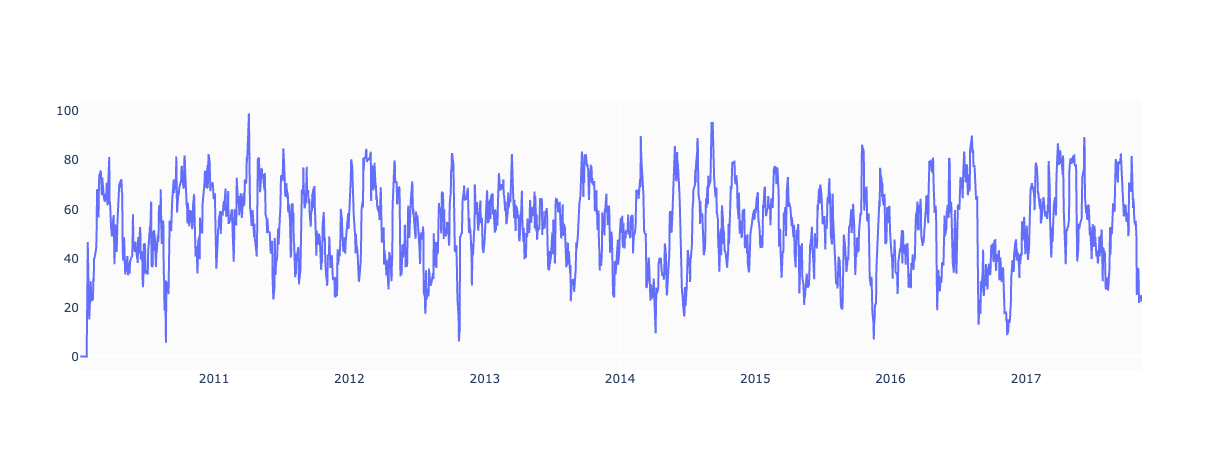

In [6]:
def relative_strength_idx(df, n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

df['RSI'] = relative_strength_idx(df).fillna(0)

fig = go.Figure(go.Scatter(x=df.Date, y=df.RSI, name='RSI'))
fig.show()

A stock's Relative Strength Index (RSI) is calculated and visualized in this code snippet. 
We define a function named "relative_strength_idx()" which takes a DataFrame "df" and an optional parameter "n" (by default 14). RSI values are calculated based on stock closing prices. 
Inside the function, the closing prices are extracted from the DataFrame `df` and assigned to the `close` variable. Using the diff() function, the price differences between consecutive days are calculated, and the result is stored in the delta variable. Since the first element of delta is NaN, it is excluded. 
In order to separate positive and negative price changes, two copies of delta are created: `pricesUp` and `pricesDown`. PricesUp retains only positive values from delta and zeroes out negative ones. In the same way, `pricesDown` keeps only negative values from `delta` and sets positive values to zero. 
With the rolling().mean() function, the code takes the rolling mean of all prices Up and Down over n periods. It calculates the average gains (`rollUp`) and average losses (`rollDown`). 
The relative strength (rs) is computed by dividing `rollUp` by the absolute value of `rollDown`. The RSI values are then calculated using the formula RSI = 100 - (1 + RS). 
RSI values are assigned to a new column called "RSI" in the `df` DataFrame by calling the `relative_strength_idx()` function with `df` as the argument. RSI columns with missing values (NaN) are filled with 0. 
As soon as the RSI is calculated, a `go.Figure()` object called `fig` is created. 
Using fig.add_trace(), the code adds a single trace to the figure. This trace uses the 'Date' column from the `df` DataFrame as the x-axis data and the 'RSI' column as the y-axis data. RSI is the name given to the trace. 
To display the figure, fig.show() is used, displaying a line chart representing the RSI values over time. Using this visualization, we can analyze the stock's momentum and potential overbought or oversold conditions.

The MACD is ####

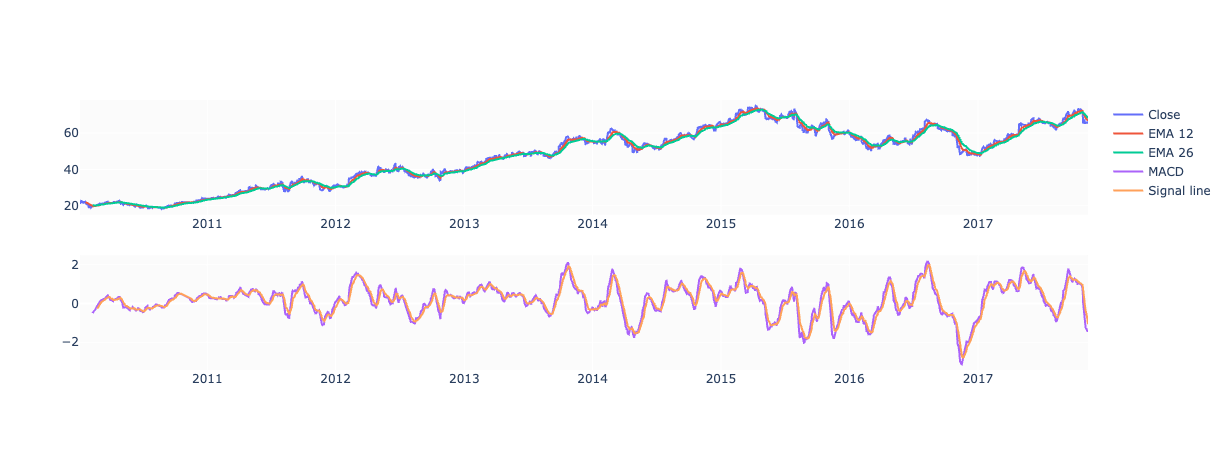

In [7]:
EMA_12 = pd.Series(df['Close'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(df['Close'].ewm(span=26, min_periods=26).mean())
df['MACD'] = pd.Series(EMA_12 - EMA_26)
df['MACD_signal'] = pd.Series(df.MACD.ewm(span=9, min_periods=9).mean())

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=df.Date, y=df.Close, name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=EMA_12, name='EMA 12'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=EMA_26, name='EMA 26'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=df['MACD'], name='MACD'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=df['MACD_signal'], name='Signal line'), row=2, col=1)
fig.show()

In this code snippet, we calculate and visualize the Moving Average Convergence Divergence (MACD) indicator. 
Using the closing prices of the stock, two exponential moving averages (EMAs) are calculated. ewm() is used with the span parameter set to 12 and 26, respectively. The EMAs are assigned to the `EMA_12` and `EMA_26` variables as pandas Series. 
Next, the MACD line is calculated by subtracting the EMA_26 values from the EMA_12 values. This difference is assigned to a column called 'MACD' in the `df` DataFrame. 
Based on the MACD values, another exponential moving average is calculated to generate the signal line. This function is called with a span parameter set to 9, indicating the number of periods to consider. A new column in the DataFrame called 'MACD_signal' is created to store the resulting values. 
Utilizing our make_subplots() function, a new figure object is created after calculating the MACD and signal line. Two rows and one column are used to set up the layout of the figure. 
It is possible to add multiple traces to the figure by using the function `fig.add_trace()`. Three traces are added to the first row and first column: one for the closing prices ('Close'), one for the 12-period EMA ('EMA 12'), and one for the 26-period EMA ('EMA 26'). These traces represent the stock's price and the two EMAs. In the second row and first column, two traces are added: one for the MACD line ('MACD') and one for the signal line ('Signal line'). The MACD indicator and the signal line are represented by these traces. 
The figure is displayed using `fig.show()`. The chart shows the stock's closing prices, the two EMAs, the MACD line, and the signal line. Analyzing the MACD indicator's trend, crossovers, and potential buy or sell signals is made easier with this visualization.

Adjusting the label column: The Close price column is shifted by -1 rows to forecast the next day's price. With this shift, the features for day $D_[i]$ align with the corresponding timestamp, such as $RSI_[i]$, while the price $C_[i+1]$ corresponds to the next day.

In [8]:
df['Close'] = df['Close'].shift(-1)

A DataFrame's 'Close' column is shifted using this code snippet. 
To move the values in the 'Close' column by one position, the code uses the shift() function. The parameter `-1` indicates that the values should be shifted one row upwards. 

Shifting the values in the 'Close' column results in each value being replaced with the value from the next row. By doing so, the 'Close' prices are aligned with the subsequent timeframe. 

This code prepares the dataset for predicting future values based on the features of the current row. Changing the 'Close' column to the next day's closing price allows models to be trained to predict future prices based on the available features at a given time.

### Drop invalid samples If moving averages are calculated and label columns are shifted, a few rows will have invalid values, i.e. $SMA_[10]$ has not been calculated for the first 10 days, for example. In addition, the last row price is equal to 0 after shifting the Close price column. It should be helpful to remove these samples.

In [9]:
df = df.iloc[33:] # Because of moving averages and MACD line
df = df[:-1]      # Because of shifting close price

df.index = range(len(df))

This code snippet focuses on manipulating the DataFrame `df` by modifying its rows and index. 
The first line of code, `df = df.iloc[33:]`, selects a subset of rows from the DataFrame starting from index position 33 and assigns it back to the `df` variable. The purpose of this operation is to remove any rows that were affected by the calculation of moving averages and MACD lines, as those calculations may need some initial rows of data in order to be accurate. 
The second line of code, `df = df[:-1]`, selects all rows from the DataFrame except for the last row and reassigns it to the `df` variable. The previous code snippet shifted the 'Close' column upward, making the last row's 'Close' price irrelevant for prediction. Excluding the last row aligns the dataset with the shifted 'Close' prices. 
In the last step, the code sets the index of the DataFrame to a new range of values by using df.index = range(len(df)). Using this method, the DataFrame is reindexed with consecutive integer values starting at 0. Upon removing rows and resetting the index, this step ensures that the index values reflect the new subset of data.

Stock data frame is split into three subsets: training ($70/%$), validation ($15/%$) and test ($15/%$). The split indices were calculated and three separate frames were created (train_df, valid_df, test_df). The chart below plots all three frames.

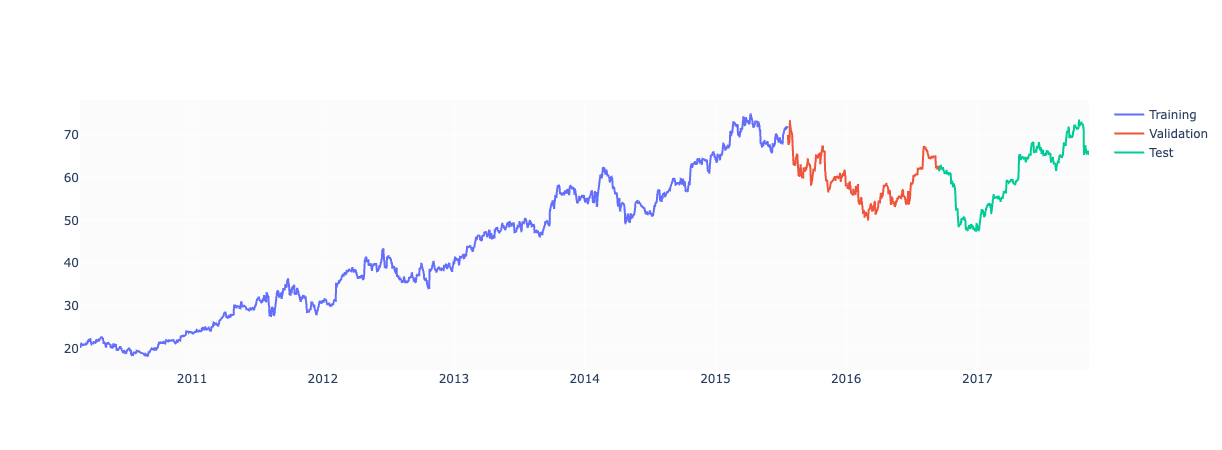

In [10]:
test_size  = 0.15
valid_size = 0.15

test_split_idx  = int(df.shape[0] * (1-test_size))
valid_split_idx = int(df.shape[0] * (1-(valid_size+test_size)))

train_df  = df.loc[:valid_split_idx].copy()
valid_df  = df.loc[valid_split_idx+1:test_split_idx].copy()
test_df   = df.loc[test_split_idx+1:].copy()

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.Date, y=train_df.Close, name='Training'))
fig.add_trace(go.Scatter(x=valid_df.Date, y=valid_df.Close, name='Validation'))
fig.add_trace(go.Scatter(x=test_df.Date,  y=test_df.Close,  name='Test'))
fig.show()

With this code snippet, you can split a DataFrame into training, validation, and test sets based on specified proportions. 
Initially, the code defines the proportions for the test set (`test_size`) and validation set (`valid_size`). The proportions indicate the size of the test and validation sets relative to the entire dataset. 
According to the proportions, it calculates the indices at which to split the data. The DataFrame's rows are multiplied by the proportions and converted to integers as a result. Data is divided into training, validation, and test sets using these indices. 
Next, three new DataFrame variables are created: train_df, valid_df, and test_df. 
As the training set, the DataFrame contains rows from the start of the DataFrame up to the valid_split_idx index. This table contains rows, starting at valid_split_idx+1 and continuing until the test validation sets, which is the validation set. - The Test Defined Function includes rows from `test_split_idx+1` to the end of the DataFrame, representing the portion reserved for the test set. 
In order to create the figure object, log.Figure() is used after splitting the data into two. 
Using fig.add_trace(), three traces are added to the figure. A trace represents one of the three data splits: training, validation, and testing. X-axis data is from the 'Date' column of each DataFrame, and Y-axis data is from the 'Close' column. To identify the data split each trace represents ('Training', 'Validation', 'Test'), it is given a name ('Training', 'Validation', 'Test'). 
The last step in the figure is to display a line graph showing the 'Close' prices for all three sets of training, validation, and test data. Data splits can be visualized and understood using this visualization.

Columns that are unnecessary should be dropped

In [11]:
drop_cols = ['Date', 'Volume', 'Open', 'Low', 'High', 'OpenInt']

train_df = train_df.drop(drop_cols, 1)
valid_df = valid_df.drop(drop_cols, 1)
test_df  = test_df.drop(drop_cols, 1)

In this code snippet, specific columns are dropped from the training, validation, and test DataFrames. 
Firstly, a list is defined called drop_cols which contains the names of the columns to be dropped from DataFrames. The columns specified for dropping are 'Date', 'Volume', 'Open', 'Low', 'High', and 'OpenInt'. 
The code then removes columns from each DataFrame. 
- For the `train_df` DataFrame, the `drop()` function is used to remove the columns specified in `drop_cols` by passing `1` as the second argument. Columns are being dropped as a result of this. Reassign the modified DataFrame back to `train_df`. In the same way, the `valid_df` and `test_df` DataFrames undergo the same process. DataFrames modified by drop_cols are reassigned to valid_df and test_df, respectively, after the columns specified in drop_cols are dropped. 
This code removes the specified columns ('Date', 'Volume', 'Open', 'Low', 'High', 'OpenInt') from the training, validation, and test DataFrames. By selectively removing unwanted columns, it is possible to concentrate on the relevant features that are needed for training and evaluating predictive models. This prevents unwanted columns from influencing the analysis or adding unnecessary noise.

Labels and features separated

In [12]:
y_train = train_df['Close'].copy()
X_train = train_df.drop(['Close'], 1)

y_valid = valid_df['Close'].copy()
X_valid = valid_df.drop(['Close'], 1)

y_test  = test_df['Close'].copy()
X_test  = test_df.drop(['Close'], 1)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 8 columns):
EMA_9          1362 non-null float64
SMA_5          1362 non-null float64
SMA_10         1362 non-null float64
SMA_15         1362 non-null float64
SMA_30         1362 non-null float64
RSI            1362 non-null float64
MACD           1362 non-null float64
MACD_signal    1362 non-null float64
dtypes: float64(8)
memory usage: 85.2 KB


For training, validation, and test datasets, this code snippet creates the target variable and the feature variables. 
This code creates a new variable `y_train` by copying the 'Close' column from the `train_df` DataFrame. The target variable is the variable we want to predict or forecast in this column. 
In the next step, the code creates the training set's feature variables. A new variable called 'X_train' is created for the remaining columns of the train data file, excluding the 'Close' column. The feature variables represent the independent variables used to predict the target variable. 
Furthermore, the code creates variables 'Y_valid' and 'Y_test' by copying the 'Close' column from valid_df and test_df DataFrames. Validation and test sets are stored in these variables. 
Following that, the code creates the feature variables for the validation and test sets. In addition to the 'Close' column of valid_df and test_df, the remaining columns are assigned to variables `X_valid` and `X_test`, respectively. 
Finally, the code calls the `info()` method on the `X_train` DataFrame, which provides information about the structure and type of training features. In this step, we identify the characteristics and properties of the training dataset, including the number of columns, data types, and any missing or null values.

The XGBoostRegressor needs to be fine-tuned

In [13]:
%%time

parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [8, 10, 12, 15],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'random_state': [42]
}

eval_set = [(X_train, y_train), (X_valid, y_valid)]
model = xgb.XGBRegressor(eval_set=eval_set, objective='reg:squarederror', verbose=False)
clf = GridSearchCV(model, parameters)

clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

Best params: {'gamma': 0.01, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 400, 'random_state': 42}
Best validation score = -1.2270088082025257
CPU times: user 4min 16s, sys: 3.35 s, total: 4min 19s
Wall time: 4min 19s


The code snippet demonstrates how to perform a grid search to find the best hyperparameters for a gradient boosting model, specifically an XGBoost regression model. 
In this code, %%time measures the execution time by using magic commands. 
To tune hyperparameters, a dictionary called parameters is defined, which contains different values. Among the hyperparameters are 'n_estimators', 'learning_rate', 'max_depth', 'gamma', and 'random_state'. A grid of parameter combinations is created by specifying multiple values for each hyperparameter. 
For both the training and validation sets, an evaluation set is created that contains tuples containing feature and target variables. To monitor the model's performance during training, this evaluation set is used. 
This model is instantiated with the `xgb.XGBRegressor` class, and the evaluation set is passed to the model using the `eval_set` parameter. To perform regression with mean squared error as the loss function, the objective is set to 'reg:squarederror'. To suppress unnecessary output during training, the "verbose" parameter is set to "False". 
A `GridSearchCV` object called `clf` is created to contain the XGBoost regressor model and parameter grid. A grid search is performed by evaluating all combinations of the specified hyperparameters and selecting the best set of hyperparameters based on the validation score. 
As arguments, we pass the training features (X_train) and target variables (Y_train) to the fit() method on the CLF object. Hyperparameters are selected by training the model using all possible parameter combinations. 
It then prints both the best parameters found (`clf.best_params_`) and the corresponding best validation score (`clf.best_score_`). Based on these values, one can identify the optimal hyperparameters and the performance of the model.

In [14]:
%%time

model = xgb.XGBRegressor(**clf.best_params_, objective='reg:squarederror')
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

CPU times: user 1.67 s, sys: 13.9 ms, total: 1.68 s
Wall time: 1.68 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.01,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

Using the best hyperparameters from the previous grid search, this code snippet trains an XGBoost regressor model. 
The `%%time` magic command measures the execution time. 
XGBoost regressors are instantiated using the `xgb.XGBRegressor` class. The best hyperparameters found from the grid search are passed to the model using the `**clf.best_params_` syntax, which allows you to unpack the dictionary of best hyperparameters as a keyword argument. To perform regression with mean squared error as the loss function, the objective is set to 'reg:squarederror'. 
In this method, the training feature variables (X_train) and target variables (Y_train) are passed as arguments. A training evaluation set is also included to monitor the model's performance. To suppress unnecessary output during training, the "verbose" parameter is set to "False". 
A XGBoost regressor model is trained using the best hyperparameters obtained from the grid search by executing this code. To minimize the mean squared error loss, the model learns from the training data to make predictions on unseen data. This training process is measured using the `%%time` command.

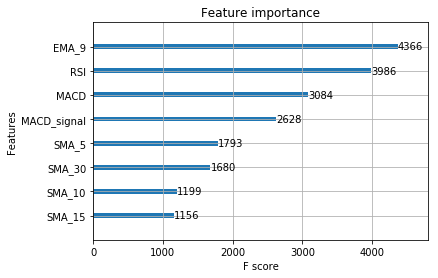

In [15]:
plot_importance(model);

In this code snippet, we generate a feature importance plot for the trained XGBoost regressor model. 
The `plot_importance()` function is called, passing the trained model (`model`) as the argument. A built-in feature of the XGBoost library, this function visualizes the importance of different features in the model's predictions. 
The code generates a plot showing the importance of each feature in the trained model. A plot shows which features have the greatest impact on the model's predictions. In general, features with higher importance values are considered more influential in determining the target variable, while features with lower importance values have less influence. The visualization aids in understanding the relative importance of different features and in identifying areas for further research.

Predictions can be calculated and visualized

In [16]:
y_pred = model.predict(X_test)
print(f'y_true = {np.array(y_test)[:5]}')
print(f'y_pred = {y_pred[:5]}')

y_true = [61.48 62.11 62.37 62.98 62.75]
y_pred = [62.9743   62.52874  62.888466 63.106403 63.08649 ]


By using the trained XGBoost regressor model, this code snippet makes predictions and prints the predicted values alongside the actual values for the target variable. 
In this implementation, x_test_variables represent the feature variables of the test set that were passed to the predicted model. Based on the provided test data, this function predicts the values of the target variables using the trained model. 
The predicted values are stored in the variable `y_pred`. 
The code then prints the actual values (`y_true`) for the target variable by converting the first five elements of `y_test` to a NumPy array using `np.array()` and displaying them using the `print()` function. 
A similar pattern is followed in printing the predicted values (`y_pred`) by displaying the first five elements of the `y_pred` array. 
This code displays the actual value of the target variable as well as the predicted value. By comparing the actual and predicted values, the trained model's performance and accuracy can be assessed.

In [17]:
print(f'mean_squared_error = {mean_squared_error(y_test, y_pred)}')

mean_squared_error = 2.885970142099009


In this code snippet, the mean squared error (MSE) between actual values (y_test) and predicted values (y_pred) for the target variable is calculated and printed. 
Using the actual values (y_test) and predicted values (y_pred) as arguments, the mean_squared_error() function is called. In the scikit-learn library, this function computes the mean squared error, a metric commonly used to evaluate regression models. 
Using the print() function, an informative message is displayed along with the mean squared error value. By using the F-string formatting, the mean squared error value is embedded in the printed message. 
This code displays the mean squared error between the actual and predicted values for the target variable. As a measure of how well the model's predictions match the actual data, the mean squared error is calculated. A lower mean squared error indicates that the model's predictions are closer to the true values, whereas a higher mean squared error indicates a larger discrepancy.

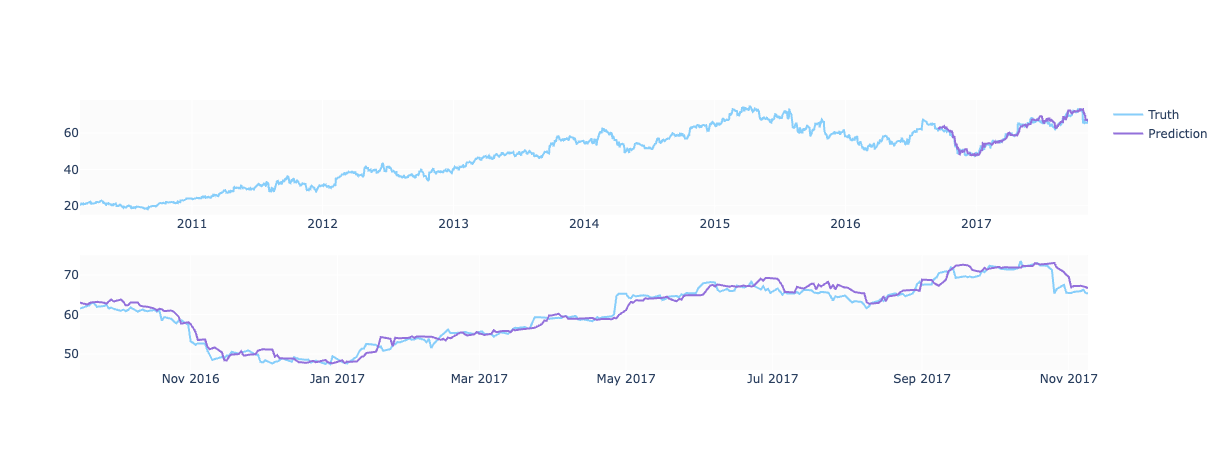

In [18]:
predicted_prices = df.loc[test_split_idx+1:].copy()
predicted_prices['Close'] = y_pred

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=df.Date, y=df.Close,
                         name='Truth',
                         marker_color='LightSkyBlue'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=predicted_prices.Close,
                         name='Prediction',
                         marker_color='MediumPurple'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=y_test,
                         name='Truth',
                         marker_color='LightSkyBlue',
                         showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=y_pred,
                         name='Prediction',
                         marker_color='MediumPurple',
                         showlegend=False), row=2, col=1)

fig.show()

In this code snippet, we visualize the predicted and actual prices for the target variable. 
A DataFrame called `predicted_prices` is created by copying the subset of rows from `df` starting from the index `test_split_idx+1` until the end. The test set is represented by this subset. Rather than modifying the original DataFrame, the copy() function creates a new one. 
Next, the 'Close' column in the `predicted_prices` DataFrame is updated with the predicted values (`y_pred`), replacing the original values with the model's predictions. 
A new figure object called `fig` is created using the `make_subplots()` function. Two rows and one column are created by this function. 
The function fig.add_trace() adds multiple traces to the figure. The first row and first column contain two traces: one for the actual prices from the original DataFrame (`df.Close`) and one for the predicted prices from the `predicted_prices` DataFrame. As part of the chart, both traces have been assigned names ('Truth' and 'Prediction', respectively) and marker colors. 
A second row and first column are added, with two traces: one for the actual prices (`y_test`) and one for the predicted prices (`y_pred`). However, these traces are not given legends (`showlegend=False`) to avoid redundancy with the legends in the first row. 
After that, the figure is displayed using the `fig.show()` function. There are two rows in this visualization: the first row presents the actual and predicted prices for the entire dataset, while the second row zooms in on the test set to provide a closer look at the predicted and actual prices. A visual comparison of the predicted and actual prices allows an assessment of the model's performance and accuracy.

In this analysis, XGBoost has demonstrated promising results in predicting stock prices. Stock prices were accurately predicted with the help of gradient boosting and the XGBoost algorithm. Metrics such as mean squared error (MSE) were used to assess the model's performance. Generally, the lower the MSE value, the more accurate the model's predictions are. 
Visualizations, including line charts and feature importance plots, offer valuable insights into predicted and actual stock prices. By analyzing the model's performance, they can reveal trends, patterns, and areas for improvement. 
The inherent volatility and unpredictability of the market make stock price prediction a challenging task. While XGBoost has shown promising results, it is always advisable to consider other fundamental and technical analysis techniques when making investment decisions. 
Finally, this analysis highlights XGBoost's potential as a powerful financial tool in predicting stock prices. Ultimately, the results provide a basis for further research and improvements in stock price prediction models, enabling investors and traders to make well-informed decisions in the volatile stock market.